In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
CREMP_SCOR_Summaries_2023_LTA = pd.read_csv("CREMP_SCOR_Summaries_2023_LTA.csv")

In [6]:
CREMP_SCOR_Summaries_2023_LTA.head()

,Year,Date,Subregion,Habitat,SiteID,Site_name,StationID,Acropora_cervicornis,Acropora_palmata,Acropora_prolifera,...,Pseudodiploria_strigosa,Scleractinia,Scolymia_cubensis,Scolymia_lacera,Siderastrea_radians,Siderastrea_siderea,Solenastrea_bournoni,Solenastrea_hyades,Stephanocoenia_intersepta,Undaria_agaricites_complex
0,2011,5/14/2011,LK,BCP,18,Content Keys,181,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,149.2,0.0,0.0,0.0,0.0
1,2011,5/14/2011,LK,BCP,18,Content Keys,182,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,23.8,0.0,0.0,7459.1,0.0
2,2011,5/14/2011,LK,BCP,18,Content Keys,183,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,150.6,0.0,0.0,0.0,0.0
3,2011,5/14/2011,LK,BCP,18,Content Keys,184,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,77.9,165.0,0.0,0.0,0.0,0.0
4,2011,6/6/2011,UK,P,21,Two Patches,211,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6727.0,614.6,0.0,211.8,103.5


In [8]:
CREMP_SCOR_Summaries_2023_LTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         2037 non-null   int64  
 1   Date                         2037 non-null   object 
 2   Subregion                    2037 non-null   object 
 3   Habitat                      2037 non-null   object 
 4   SiteID                       2037 non-null   int64  
 5   Site_name                    2037 non-null   object 
 6   StationID                    2037 non-null   int64  
 7   Acropora_cervicornis         2037 non-null   float64
 8   Acropora_palmata             2037 non-null   float64
 9   Acropora_prolifera           2037 non-null   float64
 10  Agaricia_fragilis            2037 non-null   float64
 11  Agaricia_lamarcki            2037 non-null   float64
 12  Cladocora_arbuscula          2037 non-null   float64
 13  Colpophyllia_natan

In [10]:
# Copy data
scor = CREMP_SCOR_Summaries_2023_LTA.copy()

# Convert 'Date' to datetime
scor['Date'] = pd.to_datetime(scor['Date'])

# Metadata and species columns
meta_cols = ['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID']
species_cols = [col for col in scor.columns if col not in meta_cols]

# Define threatened species
threatened_species = [
    "Acropora_cervicornis", "Acropora_palmata", "Dendrogyra_cylindrus",
    "Orbicella_annularis_complex", "Orbicella_faveolata", "Orbicella_franksi"
]
common_species = [col for col in species_cols if col not in threatened_species]

# Compute LTA aggregates
scor['Total_LTA'] = scor[species_cols].sum(axis=1)
scor['Threatened_LTA'] = scor[threatened_species].sum(axis=1)
scor['Common_LTA'] = scor[common_species].sum(axis=1)

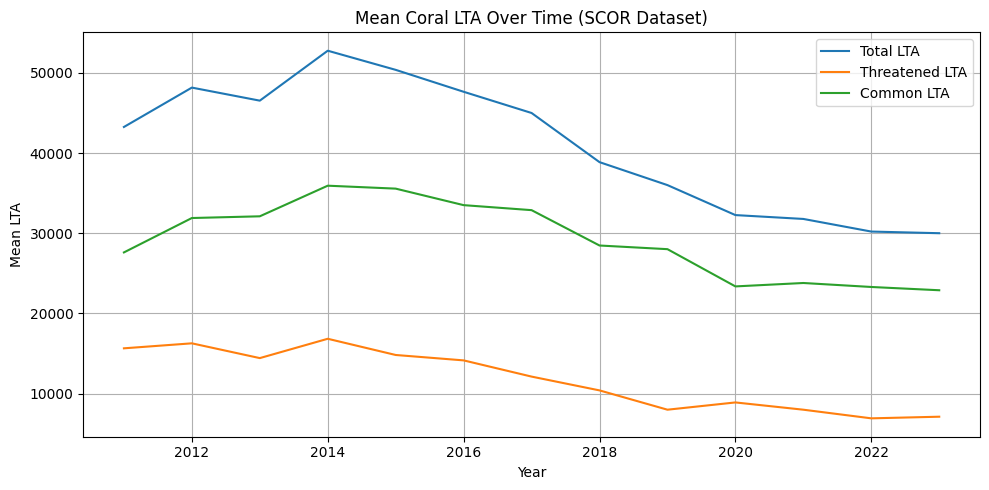

In [12]:
# Mean LTA values by year
yearly = scor.groupby('Year')[['Total_LTA', 'Threatened_LTA', 'Common_LTA']].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly, x='Year', y='Total_LTA', label='Total LTA')
sns.lineplot(data=yearly, x='Year', y='Threatened_LTA', label='Threatened LTA')
sns.lineplot(data=yearly, x='Year', y='Common_LTA', label='Common LTA')
plt.title('Mean Coral LTA Over Time (SCOR Dataset)')
plt.ylabel('Mean LTA')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

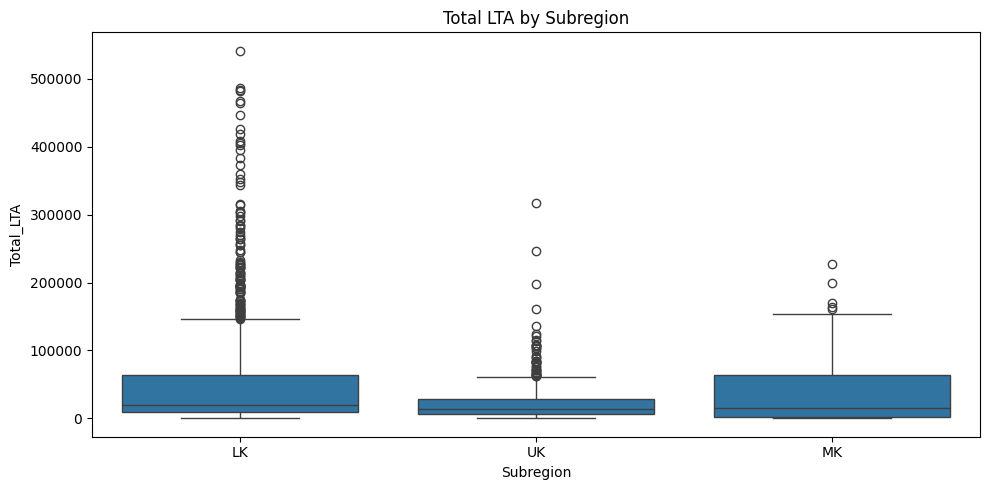

In [14]:
# Mean LTA per Subregion
plt.figure(figsize=(10, 5))
sns.boxplot(data=scor, x='Subregion', y='Total_LTA')
plt.title('Total LTA by Subregion')
plt.tight_layout()
plt.show()

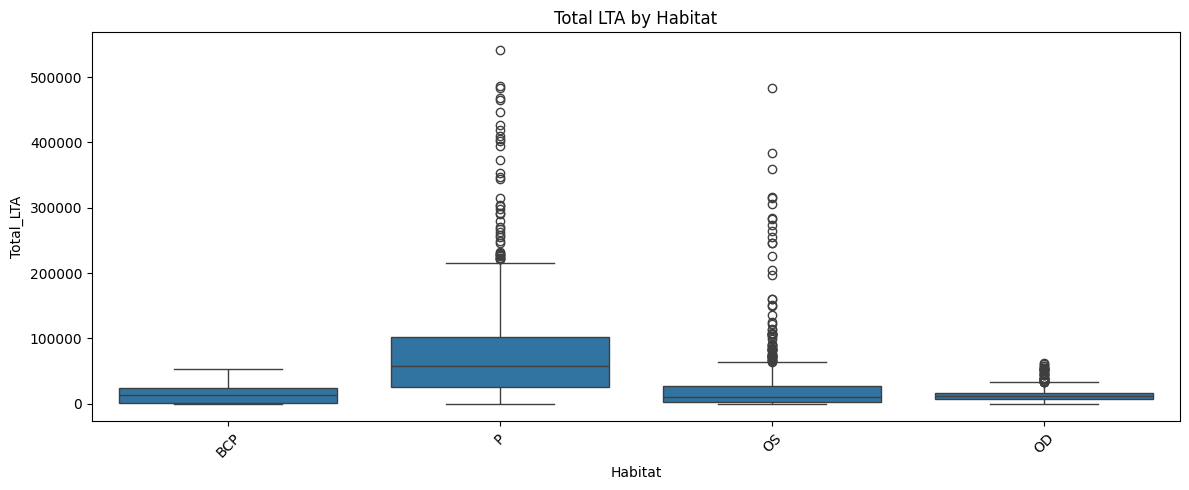

In [16]:
# Mean LTA per Habitat
plt.figure(figsize=(12, 5))
sns.boxplot(data=scor, x='Habitat', y='Total_LTA')
plt.title('Total LTA by Habitat')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

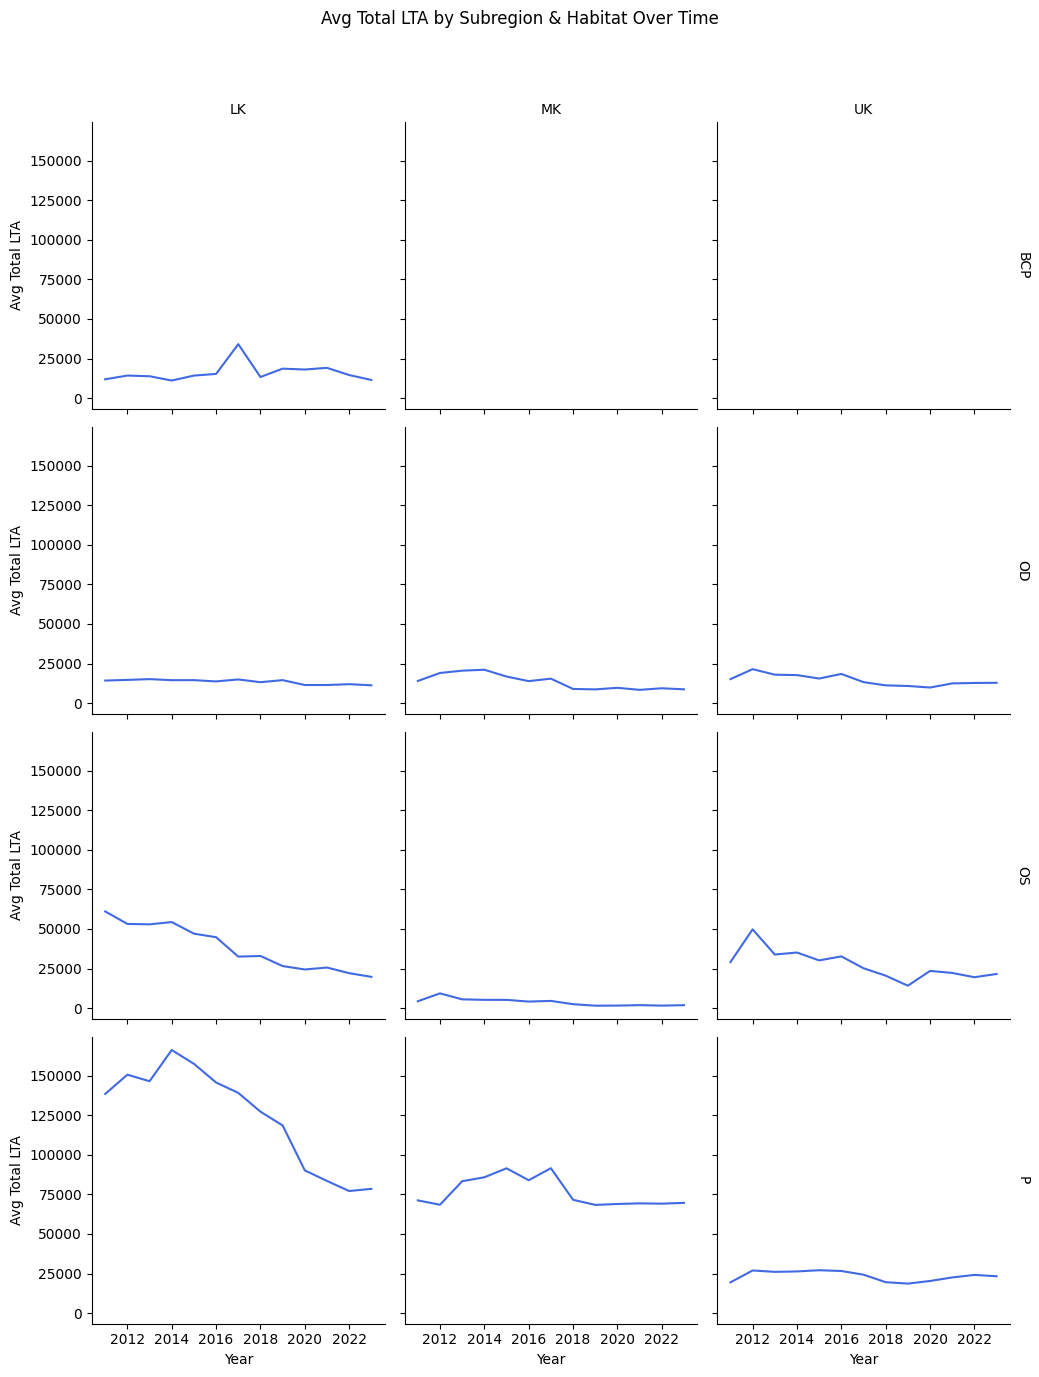

In [18]:
# Aggregate by year, subregion, and habitat
combo = (
    scor.groupby(['Year', 'Subregion', 'Habitat'])[['Total_LTA', 'Threatened_LTA']]
    .mean()
    .reset_index()
)

g = sns.FacetGrid(combo, col='Subregion', row='Habitat', height=3.5, margin_titles=True)
g.map_dataframe(sns.lineplot, x='Year', y='Total_LTA', color='royalblue')
g.set_titles(row_template='{row_name}', col_template='{col_name}')
g.set_axis_labels('Year', 'Avg Total LTA')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Avg Total LTA by Subregion & Habitat Over Time')
plt.show()

C:\Users\yunus\AppData\Local\Temp\ipykernel_4260\3540717972.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_lta_mean.values, y=species_lta_mean.index, palette='magma')


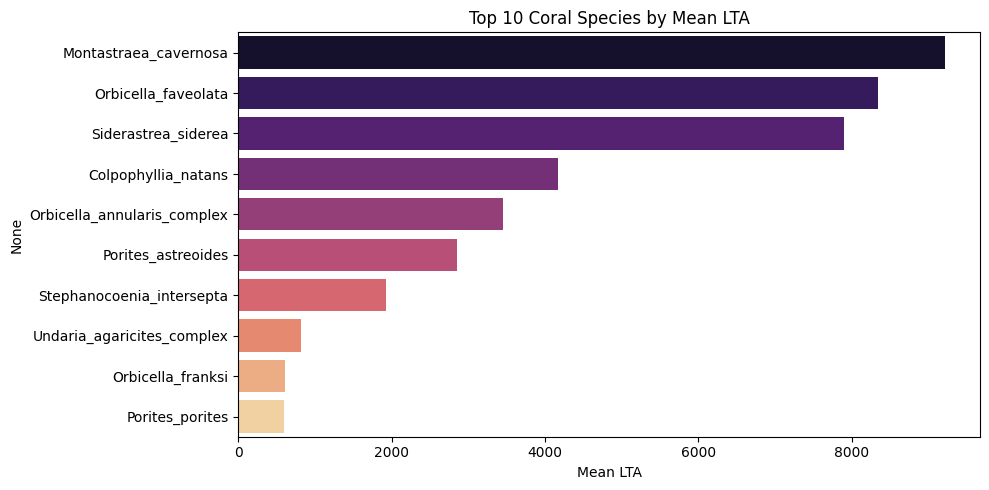

In [20]:
species_lta_mean = scor[species_cols].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=species_lta_mean.values, y=species_lta_mean.index, palette='magma')
plt.title('Top 10 Coral Species by Mean LTA')
plt.xlabel('Mean LTA')
plt.tight_layout()
plt.show()

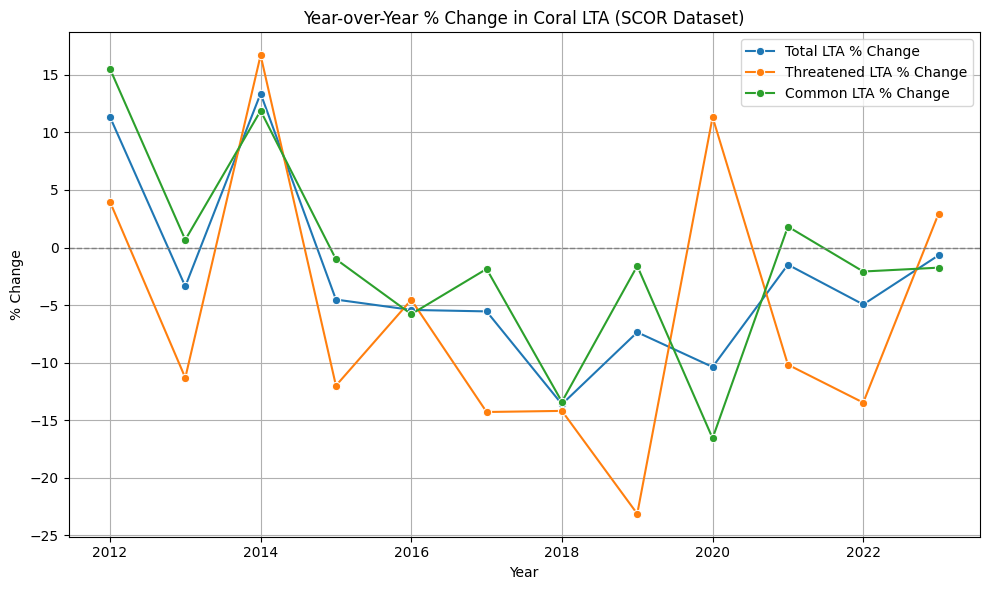

In [22]:
# Group by year and compute mean
yearly = scor.groupby('Year')[['Total_LTA', 'Threatened_LTA', 'Common_LTA']].mean()

# Calculate % change year over year
yoy_change = yearly.pct_change() * 100
yoy_change = yoy_change.reset_index()

# Plot YoY change
plt.figure(figsize=(10, 6))
sns.lineplot(data=yoy_change, x='Year', y='Total_LTA', label='Total LTA % Change', marker='o')
sns.lineplot(data=yoy_change, x='Year', y='Threatened_LTA', label='Threatened LTA % Change', marker='o')
sns.lineplot(data=yoy_change, x='Year', y='Common_LTA', label='Common LTA % Change', marker='o')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Year-over-Year % Change in Coral LTA (SCOR Dataset)')
plt.ylabel('% Change')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
